![Kickstarter-Logo](Kickstarter-Logo.png)

Link for the **YouTube Video** here: https://www.youtube.com/watch?v=sNIaxWBHDY4

# 2487 MACHINE LEARNING - FINAL PROJECT
#### GROUP 6: 
- Maria Baglieri Occhipinti (49638)
- Moritz Constantin Güttersberger (48845)
- Moritz Lilleholt Häckel (49558)
- Eugenia Saggioro (50958)
- Dominik Trut (46274)

### **TABLE OF CONTENTS**

[**1. FROM BUSINESS PROBLEM TO MACHINE LEARNING**](#FROM-BUSINESS-PROBLEM-TO-MACHINE-LEARNING)

   [1.1 Business Understanding](#Business-Understanding)

   [1.2 Problem Definition](#Problem-Definition)

[**2. DATA UNDERSTANDING**](#DATA-UNDERSTANDING)

[2.1 Loading Data](#Loading-Data)

[2.2 IDA](#Initial-Data-Analysis)
   - [Data Cleaning](#Data-Cleaning)
   - [Main Statistics](#Main-Statistics)
       -  [Structure and Quality of Data](#Structure-and-Quality-of-Data)

[2.3 EDA](#Exploratory-Data-Analysis)
   - [Data Preparation](#Data-Preparation)
   - [Data Visualization](#Data-Visualization)
   - [Natural Language Processing](#Natural-Language-Processing)
   - [Preprocessing and Feature Selection](#Preprocessing-and-Feature-Selection)

[**3. MODELING**](#MODELING)

[3.1 Overview](#Overview)

[3.2 Logistic Regression](#Logistic-Regression)
   - [Logistic Regression with PCA](#Logistic-Regression-with-PCA)

[3.3 Random Forest](#Random-Forest)

[3.4 XGBoost](#XGBoost)



[**4. EVALUATION**](#EVALUATION)

[**5. DEPLOYMENT**](#DEPLOYMENT)

# FROM BUSINESS PROBLEM TO MACHINE LEARNING

## Business Understanding


Kickstarter is a crowdfunding platform that allows people to support creative projects. Film, gaming, and music, as well as art, design, and technology projects, are all covered.

The dataset at hand was crawled from the platform and contains detailed information about all current and historic projects on Kickstarter, as well as their status (successful, failed, canceled, live, suspended). 

Every project creator establishes a financing target (funding goal) and a deadline for their project. People can donate money to help make the concept a reality if they like it. Funding on Kickstarter is “all-or-nothing”. If the project meets its funding goal, all backers' credit cards will be charged after the deadline passes and Kickstarter deducts a 5% fee from pledged amount. On the other hand, if the projects fall short of its funding goal, no one is charged. 

Project creators retain complete ownership of their work. After a project is deemed successful, Kickstarter cannot be used to seek loans or to give financial returns or equity. Backers can support projects to help them come to life, not to profit monetarily. 

Kickstarter has a great potential to bring ideas to fruition. At the same time, Kickstarter's project have few risky characteristics for backers and creators who want to invest or launch successful projects.

## Problem Definition

During the course of this project, we will take the perspective of project creators to assist them with an evaluation of how probable the project is to reach the funding goal with given features at launch. With a realistic evaluation creators can be preserved from wasting valuable resources on projects with a low probability to succeed.

For a project’s success or failure on crowdfunding platforms, it’s important to consider the influence of all the factors characterizing that project. Some of these factors can be measured or classified, allowing for the development of a model to forecast whether a project will succeed or fail. 

Some projects are more successful than others and our intuition is that this does not always depend on the key idea. Some projects might fail because they don’t hit the target (backers) due to wrong descriptions, uncommon topic, too high funding goal or simply the project doesn’t seem trustworthy. We will try to find the main patterns and the odds of a project’s success. Thanks to this model, decision makers (project creators) will gain useful insights before publishing their project on the platform.

In order to achieve the goal explained above, we will use a dataset crawled from Kickstarter, which contains detailed information about all current and historic projects on Kickstarter, as well as their status (successful, failed, canceled, live, suspended). The dataset contains all the projects hosted between 2009 and 18 October 2018.

Given the **large amount** of original data available (205696 projects with more than 37 variables), and the reasons explained below, it is reasonable to involve automation to solve this problem. 
- There is no **existing formula** to understand a priori if a project will be successful based on specific characteristics.The features of each project set on the platform contribute in different ways to its success and this cannot be translated into simple rules.
- Analyzing the probability of success and which are the main drivers of the end result, project by project, would **not** be **feasible**. 
- Some columns like the description of the project (blurb, slug) contain **unstructured text** which needs to be analyzed in depth with Natural language Processing. 

All in all, there is a big potential for data to be **represented in a meaningful way**, with both numbers and categorical values (e.g. state, status, location). In the next sections, we will explain these reasoning better.

**PROJECT GOAL**: Predict campaign success on Kickstarter by leveraging machine learning techniques (e.g. NLP)
POTENTIAL INTERESTED PARTIES: 
-	Potential creators who want to understand how well their campaign will perform 
-	Competitive crowdfunding sites wanting to understand the drivers of successful campaigns 
**DATA SOURCE**: CSV files scraped from Kickstarter 

**OUTCOME**: Create a predictive model utilizing numeric, text, and categorical data in order to predict whether a campaign is successful.

# DATA UNDERSTANDING

## Loading data

In [114]:
# All the necessary packages

import pandas as pd
import numpy as np
import os
import datetime
import seaborn as sns
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
from matplotlib import cm

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings('ignore')

%matplotlib inline
import re
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import wordnet 
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn import set_config 
from sklearn.decomposition import TruncatedSVD
from scipy import sparse as sp

from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, precision_recall_fscore_support, accuracy_score, auc, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
import itertools

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression

from scipy.sparse import csr_matrix
from sklearn import datasets

from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.sklearn


from sklearn import set_config 
import time
import xgboost as xgb
import warnings


Import the available datasets and merge all the csv files to have all the data together.

In [3]:
files = [file for file in os.listdir('Kickstarter_Dataset')]

all_df = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Kickstarter_Dataset/'+file)
    all_df = pd.concat([all_df, df])
    
all_df.to_csv("Kickstarter_Complete.csv", index = False)

Import the complete dataset.

In [2]:
df = pd.read_csv("Kickstarter_Complete.csv")

df.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,210,Believing Heart Tarot is a one of a kind addit...,"{""id"":21,""name"":""Digital Art"",""slug"":""art/digi...",14166,US,1513372142,"{""id"":1647802423,""name"":""Catstealers-Zines"",""s...",USD,$,True,...,believing-heart-tarot-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1522555142,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",14166.00,international
1,3,Be a part of Street Art Magic and have a hand ...,"{""id"":53,""name"":""Public Art"",""slug"":""art/publi...",42,US,1390444485,"{""id"":1960090658,""name"":""Inman E. Goodman III""...",USD,$,True,...,zone-7-street-arts-initiative,https://www.kickstarter.com/discover/categorie...,False,False,failed,1392323039,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",42.00,international
2,31,My writing changed after my daughter was kille...,"{""id"":359,""name"":""Print"",""slug"":""journalism/pr...",1127,US,1404688773,"{""id"":2049496016,""name"":""Diane Neas"",""is_regis...",USD,$,True,...,loving-becca-journey-of-child-loss,https://www.kickstarter.com/discover/categorie...,True,False,successful,1407702831,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1127.00,international
3,4,The Sweet Botanist's natural syrups are made s...,"{""id"":307,""name"":""Drinks"",""slug"":""food/drinks""...",105,US,1464156479,"{""id"":1723204437,""name"":""Amber M."",""is_registe...",USD,$,True,...,the-sweet-botanist-syrup-co,https://www.kickstarter.com/discover/categorie...,False,False,failed,1466802580,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",105.00,international
4,800,The digital restoration of the classic 1968 Ro...,"{""id"":30,""name"":""Documentary"",""slug"":""film & v...",28720,US,1331149074,"{""id"":1765735821,""name"":""Fred Padula"",""is_regi...",USD,$,True,...,el-capitan-film-restoration,https://www.kickstarter.com/discover/categorie...,True,False,successful,1351739753,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",28720.42,international


In [3]:
df.dtypes

backers_count                 int64
blurb                        object
category                     object
converted_pledged_amount      int64
country                      object
created_at                    int64
creator                      object
currency                     object
currency_symbol              object
currency_trailing_code         bool
current_currency             object
deadline                      int64
disable_communication          bool
friends                      object
fx_rate                     float64
goal                        float64
id                            int64
is_backing                   object
is_starrable                   bool
is_starred                   object
launched_at                   int64
location                     object
name                         object
permissions                  object
photo                        object
pledged                     float64
profile                      object
slug                        

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205696 entries, 0 to 205695
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             205696 non-null  int64  
 1   blurb                     205686 non-null  object 
 2   category                  205696 non-null  object 
 3   converted_pledged_amount  205696 non-null  int64  
 4   country                   205696 non-null  object 
 5   created_at                205696 non-null  int64  
 6   creator                   205696 non-null  object 
 7   currency                  205696 non-null  object 
 8   currency_symbol           205696 non-null  object 
 9   currency_trailing_code    205696 non-null  bool   
 10  current_currency          205696 non-null  object 
 11  deadline                  205696 non-null  int64  
 12  disable_communication     205696 non-null  bool   
 13  friends                   276 non-null     o

## Initial Data Analysis

### Data Cleaning

#### Columns to delete.

We decided to preliminary delete the following columns as they are not useful for our analysis: 
- currency_symbol: the symbol of the original currency the project goal was denominated in.
- currency_trailing_code: the code of the original currency the project goal was denominated in.
- id: id number of the project.
- photo: contains a link and information to the project's image.
- permissions: just 276 values. 
- friends: just 274 values.
- source_url: url for the project's category.
- is_backing: just 276 values.
- is_starred: just 276 values.
- usd_type: international or domestic.

In [5]:
del df['currency_symbol']
del df['currency_trailing_code']
del df['id']
del df['photo']
del df['permissions']
del df['friends']
del df['source_url']
del df['is_backing']
del df['is_starred']
del df['usd_type']

#### Rename backers_count into nr_backers.
backers_count shows the number of backers for that project.

In [6]:
df=df.rename(columns={"backers_count":"nr_backers"})

#### Create 3 new columns from the category column: category, subcategory and category_id.

In [7]:
df=df.rename(columns={"category":"Category"})

In [8]:
df['category'] = df['Category'].apply(lambda x: x.split('"slug":"')[1].split('/')[0])
df['category'] = df['category'].apply(lambda x: x.split('"')[0])
df['subcategory'] = df['Category'].apply(lambda x: x.split('"name":"')[1].split('"')[0])
df['subcategory_id'] = df['Category'].apply(lambda x: x.split('"id":')[1].split(',')[0])

In [9]:
del df['Category']

#### Modify the date time columns.

In [10]:
df['created_at'] = pd.to_datetime(df['created_at'],origin='unix', unit="s").dt.normalize()
df['state_changed_at'] = pd.to_datetime(df['state_changed_at'],origin='unix', unit="s").dt.normalize()
df['deadline'] = pd.to_datetime(df['deadline'],origin='unix', unit="s").dt.normalize()
df['launched_at'] = pd.to_datetime(df['launched_at'],origin='unix', unit="s").dt.normalize()

In [11]:
df.head()

,nr_backers,blurb,converted_pledged_amount,country,created_at,creator,currency,current_currency,deadline,disable_communication,...,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,category,subcategory,subcategory_id
0,210,Believing Heart Tarot is a one of a kind addit...,14166,US,2017-12-15,"{""id"":1647802423,""name"":""Catstealers-Zines"",""s...",USD,USD,2018-04-01,False,...,True,False,successful,2018-04-01,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",14166.00,art,Digital Art,21
1,3,Be a part of Street Art Magic and have a hand ...,42,US,2014-01-23,"{""id"":1960090658,""name"":""Inman E. Goodman III""...",USD,USD,2014-02-13,False,...,False,False,failed,2014-02-13,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",42.00,art,Public Art,53
2,31,My writing changed after my daughter was kille...,1127,US,2014-07-06,"{""id"":2049496016,""name"":""Diane Neas"",""is_regis...",USD,USD,2014-08-10,False,...,True,False,successful,2014-08-10,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1127.00,journalism,Print,359
3,4,The Sweet Botanist's natural syrups are made s...,105,US,2016-05-25,"{""id"":1723204437,""name"":""Amber M."",""is_registe...",USD,USD,2016-06-24,False,...,False,False,failed,2016-06-24,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",105.00,food,Drinks,307
4,800,The digital restoration of the classic 1968 Ro...,28720,US,2012-03-07,"{""id"":1765735821,""name"":""Fred Padula"",""is_regi...",USD,USD,2012-11-01,False,...,True,False,successful,2012-11-01,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",28720.42,film & video,Documentary,30


#### Create 4 new columns from the creator one: creator_id, creator_name, is_registered.

In [12]:
df['creator_id'] = df['creator'].apply(lambda x: x.split('"id":')[1].split(',')[0])
df['creator_name'] = df['creator'].apply(lambda x: x.split('"name":"')[1].split('"')[0])
df['is_creator_registered'] = df['creator'].apply(lambda x: x.split('"is_registered":')[1].split(',')[0])

In [13]:
del df['creator']

#### Create 2 new columns from the location one: city and state.

In [14]:
df['nation'] = df['location'].astype(str).apply(lambda x: x.split('"state":"')[1].split('"')[0] if len(x.split('"state":"'))>1 else x.split('-')[0])
df['city'] = df['location'].astype(str).apply(lambda x: x.split('"name":"')[1].split('"')[0] if len(x.split('"name":"'))>1 else x.split('-')[0])

In [15]:
del df['location']

#### Create 2 columns from the profile one: project_id and project_status.

In [16]:
df['project_id'] = df['profile'].apply(lambda x: x.split('"id":')[1].split(',')[0])
df['project_status'] = df['profile'].apply(lambda x: x.split('"state":"')[1].split('"')[0])

In [17]:
del df['profile']

#### Modify the urls column.

In [18]:
df['url'] = df['urls'].apply(lambda x: x.split('"project":"')[1].split('"')[0])

In [19]:
del df['urls']

#### Converting the goal in USD.

In [20]:
df['usd_goal'] = round(df['goal'] * df['static_usd_rate'],2)

Given that we have a new column with the goal of all projects in USD we can drop these two columns:

In [21]:
del df['goal']
del df['static_usd_rate']

#### Dropping duplicates

Check the number of projects that are listed more than one and drop them.

In [22]:
print(f"The number of duplicates is {len(df[df.duplicated(subset='project_id')])} over {len(df)} projects.")

The number of duplicates is 18622 over 205696 projects.


In [23]:
df.drop_duplicates(inplace=True)

In this section, we will create new variables useful for the understanding of projects' characteristics. Creators, before publishing a project, have to carefully think about name, keywords and description of the project, as well as the launch time and day of the campaign. Then we create new variable regarding duration of a campaign, amount usually pledged by backers and datetime characteristics of each project (day, month). These will be useful info to analyze during the exploration of the data.

In [24]:
#Name: Word length
df['name_len'] = df['name'].str.split().str.len()
df.name_len.fillna(0, inplace=True)

#Blurb: Word length
df['blurb_len'] = df['blurb'].str.split().str.len()
df.blurb_len.fillna(0, inplace=True)

#Slug: Word length
df['slug_len'] = df['slug'].str.split("-").str.len()
df.slug_len.fillna(0, inplace=True)

#Average pledge per backer
df['pledge_per_backer'] = round(df['usd_pledged']/df['nr_backers'],2)

#Time between creating and launching the project
df['creation_to_launch_days'] = df['launched_at'] - df['created_at']
df['creation_to_launch_days'] = df['creation_to_launch_days'].dt.round('d').dt.days

#Length of the campaign
df['campaign_days'] = df['deadline'] - df['launched_at']
df['campaign_days'] = df['campaign_days'].dt.round('d').dt.days

# Launch and deadline day of week
df['launch_day'] = df['launched_at'].dt.day_name()
df['deadline_day'] = df['deadline'].dt.day_name()

# Launch and deadline month
df['launch_month'] = df['launched_at'].dt.month_name()
df['deadline_month'] = df['deadline'].dt.month_name()

#### Ordering the columns.

In [25]:
df = df[['project_id', 'state', 'name','name_len', 'slug', 'slug_len', 'blurb','blurb_len', 'url', 'category', 'subcategory','subcategory_id', 
         'country', 'created_at', 'nation', 'city', 
         'launched_at','launch_day','launch_month','creation_to_launch_days','deadline','deadline_day','deadline_month','campaign_days', 
         'nr_backers','pledge_per_backer', 'usd_goal', 'pledged', 'currency', 'usd_pledged', 'current_currency', 
         'fx_rate', 'project_status', 'state_changed_at', 'disable_communication', 'is_starrable', 'spotlight', 'staff_pick']]

In [26]:
df.dtypes

project_id                         object
state                              object
name                               object
name_len                          float64
slug                               object
slug_len                            int64
blurb                              object
blurb_len                         float64
url                                object
category                           object
subcategory                        object
subcategory_id                     object
country                            object
created_at                 datetime64[ns]
nation                             object
city                               object
launched_at                datetime64[ns]
launch_day                         object
launch_month                       object
creation_to_launch_days             int64
deadline                   datetime64[ns]
deadline_day                       object
deadline_month                     object
campaign_days                     

#### Saving the new dataset.

In [27]:
df.to_csv("Cleaned_Kickstarter.csv", index = False)

#### Description of our final variables.

- **project_id**: id of the project.
- **state**: status of the project (successful, failed, canceled, live, suspended)
- **name**: name of the project.
- **name_len**: length of the name. 
- **slug**: keywords put by the creator about the project.
- **slug_len**: length of slug
- **blurb**: description of what’s the project about.
- **blurb_len**: length of the blurb.
- **url**: url of the project.
- **category**: category of the project.
- **subcategory**: subcategory of the project.
- **subcategory_id**: id of the subcategory of the project.
- **creator_id**: id of the creator of the project.
- **creator_name**: name of the creator of the project.
- **is_creator_registered**: boolean variable
- **country**: country where the project has originated.
- **nation**: nation where the project has originated.
- **city**: city where the project has originated.
- **created_at**: when the project has been created - yyyy/mm/dd.
- **launched_at**: launch date of the project - yyyy/mm/dd.
- **launch_day**: day of the week in which the project has been launched. 
- **launch_month**: month in which the project has been launched.
- **creation_to_launch_days**: number of days between the creation and the launch of the project.
- **deadline**: deadline of the project - yyyy/mm/dd.
- **deadline_day**: day of the week in which the project has been closed. 
- **deadline_month**: month in which the project has been closed.
- **campaign_days**: number of days between the launch and the deadline. 
- **nr_backers**: number of backers for the project.
- **pledge_per_backer**: total amount of money pledged divided by the number of backers. 
- **usd_goal**: amount of money for reaching the goal in usd.
- **pledged**: pledged amount in the initial currency.
- **currency**: currency of the project.
- **usd_pledged**: pledged amount multiplied for the static usd rate.             
- **current_currency**: current currency of the project.
- **fx_rate**: exchange rate.                                 
- **project_status**: active or inactive          
- **state_changed_at**: when the state of the project changed - yyyy/mm/dd.         
- **disable_communication**: status about communication, id false for all campaigns that have ended.   
- **is_starrable**: how successful Kickstarter believes the campaign will be.           
- **spotlight**: after your project is successfully funded you will gain access to the Spotlight page tool which allows you to make a home for your project.   
- **staff_pick**: feature that highlights promising projects on the site to give them a boost by helping them get exposure through email newsletter and highlighted spots around the site.

### Main Statistics

#### Structure and Quality of Data

The amount of data available is enough to build a machine learning model. We have information regarding:
- The type of the project (category, subcategory, brief description, its profile)
- The creator
- The start date, the duration of the campaign, and the date when the status of the project was changed 
- The funding goal, the pledged amount, the original currency, the exchange rate and the converted pledged amount. 
- The number of backers achieved. 
For more information regarding the variables available, please see the below sections.

The *quality* and the *quantity* of data are fundamental to building an efficient model. The data available is complete and consistent across the datasets. There are some variables with almost all empty cells (friends, is_starred, etc.) and some others with an invalid format (category, creator, location, etc.) that must be modified or dropped. 

Around 55% of the projects available are successful, ~ 36% are labeled as failed and the rest is live/canceled/suspended. This means we have little information regarding the canceled projects. Nevertheless, we have a big and almost balanced amount of successful and failed projects. 

12% of the projects are current ones, while around 88% are past projects. This difference is valuable since we will work on past projects to build an efficient model and apply it to current projects. 

Projects are split into 15 categories and 159 subcategories. As we can see on the right, Music, Film & Video and Technology are the categories with more projects while Dance is the category with only 3 subcategories and 3156 projects (less than 2% of the entire dataset).

All in all, we can state the quality of data is good enough to work on it and create a model. 

Data available presents **regular patterns** between the independent variables (inputs) and the final result (success/failure, pledged amount). These patterns are necessary for the model to learn from them and to extract a valid output.

In [28]:
df['created_at'] = pd.to_datetime(df['created_at'],origin='unix')
print(f"The datasets dates range between {min(df.created_at).strftime('%d %B %Y')} and {max(df.created_at).strftime('%d %B %Y')}.")

The datasets dates range between 21 April 2009 and 18 October 2018.


How many successful/failed/canceled projects?

In [29]:
df['state'].value_counts(normalize=True) * 100

successful    53.284702
failed        39.392096
canceled       4.513259
live           2.483562
suspended      0.326381
Name: state, dtype: float64

In general Kickstarter Projects are more likely to be successful than a failure. The proportion of projects being canceled or suspended is below 5%. In our dataset 2.4% of the projects are still live, meaning there was no final result on whether the project was successful or not by the time the data was scraped.

Statistics regarding categories and subcategories available

In [30]:
nr_category = df['category'].nunique()
nr_subcategory = df['subcategory'].nunique()
active_projects = df['project_status'].value_counts()

print(f'There are {nr_category} categories')
print(f'There are {nr_subcategory} subcategories')
print(f'There are {active_projects[1]} current projects and {active_projects[0]} past ones')

There are 15 categories
There are 159 subcategories
There are 22411 current projects and 166632 past ones


In [31]:
df_category = pd.DataFrame({ 'Nr of subcategories': df.groupby('category')['subcategory'].nunique(),
                            'Projects per category': df.groupby('category')['project_id'].nunique()
                           }).sort_values('Projects per category', ascending = False)
df_category["Frequency"] = df_category['Projects per category']/df_category['Projects per category'].sum()*100

df_category

,Nr of subcategories,Projects per category,Frequency
category,,,
music,19,25359,13.555598
film & video,20,25274,13.510162
technology,16,19087,10.202914
art,13,18621,9.953815
publishing,18,17797,9.513348
food,13,15688,8.385986
games,8,11809,6.312475
fashion,9,11153,5.961812
comics,6,8166,4.365118


In terms of categories, music and film & video are the most dominant categories in terms of projects, together accounting for almost a third of all projects. The first 5 categories are accounting for roughly as many projects as the last 10, showing that there are categories that are heavily favored by the Kickstarter community.

In [32]:
cat_sub = df.groupby(['category','subcategory']).size()
cat_sub_frame = cat_sub.to_frame()
cat_sub_frame

0
category subcategory         
art      Art              730
         Ceramics         345
         Conceptual Art  1098
         Digital Art     1587
         Illustration    2404
...                       ...
theater  Immersive        391
         Musical         1012
         Plays           1522
         Spaces           224
         Theater         2331

[169 rows x 1 columns]

In [33]:
df.columns

Index(['project_id', 'state', 'name', 'name_len', 'slug', 'slug_len', 'blurb',
       'blurb_len', 'url', 'category', 'subcategory', 'subcategory_id',
       'country', 'created_at', 'nation', 'city', 'launched_at', 'launch_day',
       'launch_month', 'creation_to_launch_days', 'deadline', 'deadline_day',
       'deadline_month', 'campaign_days', 'nr_backers', 'pledge_per_backer',
       'usd_goal', 'pledged', 'currency', 'usd_pledged', 'current_currency',
       'fx_rate', 'project_status', 'state_changed_at',
       'disable_communication', 'is_starrable', 'spotlight', 'staff_pick'],
      dtype='object')

In [34]:
pd.set_option('display.max_columns', None)

df_grouped = df.groupby('category')
df_grouped.describe()

name_len                                               slug_len  \
                count      mean       std  min  25%  50%  75%   max    count   
category                                                                       
art           18641.0  5.646317  2.616955  0.0  4.0  5.0  8.0  16.0  18641.0   
comics         8192.0  5.743042  2.668474  1.0  4.0  5.0  8.0  21.0   8192.0   
crafts         6071.0  5.370614  2.573343  1.0  3.0  5.0  7.0  18.0   6071.0   
dance          3183.0  5.697141  2.679627  1.0  4.0  6.0  8.0  17.0   3183.0   
design         6734.0  5.889664  2.630382  1.0  4.0  6.0  8.0  14.0   6734.0   
fashion       11525.0  5.991063  2.645818  1.0  4.0  6.0  8.0  17.0  11525.0   
film & video  25323.0  5.130553  2.807310  1.0  3.0  5.0  7.0  19.0  25323.0   
food          15700.0  5.528344  2.625952  1.0  3.0  5.0  8.0  20.0  15700.0   
games         12593.0  5.438498  2.819070  1.0  3.0  5.0  8.0  17.0  12593.0   
journalism     4622.0  5.371701  2.760646  1.0  3.0  5.0  7.0  15.0   4622.0   
music         25419.0  6.312994  2.600425  1.0  4.0  6.0  8.0  19.0  25419.0   
photography    7319.0  5.554584  2.621154  1.0  3.0  5.0  8.0  17.0   7319.0   
publishing    17830.0  6.095681  2.693171  1.0  4.0  6.0  8.0  18.0  17830.0   
technology    19240.0  6.077079  2.870606  1.0  4.0  6.0  8.0  16.0  19240.0   
theater        6651.0  6.000902  2.665852  1.0  4.0  6.0  8.0  17.0   6651.0   

                                                           blurb_len  \
                  mean       std  min  25%  50%  75%   max     count   
category                                                               
art           5.414409  2.360686  1.0  4.0  5.0  7.0  16.0   18641.0   
comics        5.508179  2.446633  1.0  4.0  5.0  7.0  17.0    8192.0   
crafts        5.107725  2.327104  1.0  3.0  5.0  7.0  13.0    6071.0   
dance         5.506440  2.445228  1.0  4.0  5.0  7.0  15.0    3183.0   
design        5.510841  2.381008  1.0  4.0  5.0  7.0  14.0    6734.0   
fashion       5.606941  2.397200  1.0  4.0  6.0  7.0  15.0   11525.0   
film & video  4.848359  2.499062  1.0  3.0  4.0  7.0  15.0   25323.0   
food          5.287834  2.400213  1.0  3.0  5.0  7.0  19.0   15700.0   
games         5.106726  2.537685  1.0  3.0  5.0  7.0  14.0   12593.0   
journalism    5.132627  2.527910  1.0  3.0  5.0  7.0  15.0    4622.0   
music         6.056533  2.343872  1.0  4.0  6.0  8.0  17.0   25419.0   
photography   5.266293  2.366697  1.0  3.0  5.0  7.0  12.0    7319.0   
publishing    5.847672  2.470129  1.0  4.0  6.0  8.0  14.0   17830.0   
technology    5.655301  2.614099  1.0  4.0  6.0  8.0  14.0   19240.0   
theater       5.783491  2.423327  1.0  4.0  6.0  8.0  13.0    6651.0   

                                                                \
                   mean       std  min   25%   50%   75%   max   
category                                                         
art           19.017596  5.055264  0.0  16.0  20.0  23.0  35.0   
comics        19.553101  4.536224  0.0  17.0  20.0  23.0  31.0   
crafts        18.621314  5.449731  0.0  16.0  20.0  23.0  31.0   
dance         19.371034  3.967926  3.0  17.0  20.0  22.0  30.0   
design        18.182061  4.930179  1.0  15.0  19.0  22.0  31.0   
fashion       18.000174  5.183763  0.0  15.0  19.0  22.0  31.0   
film & video  19.690874  4.928396  1.0  17.0  21.0  23.0  35.0   
food          19.283121  5.070963  0.0  17.0  20.0  23.0  32.0   
games         18.969825  4.825435  1.0  16.0  20.0  22.0  31.0   
journalism    19.509952  4.619826  1.0  17.0  20.0  23.0  32.0   
music         19.898265  5.138436  1.0  17.0  21.0  23.0  34.0   
photography   19.057795  4.825381  1.0  17.0  20.0  22.0  34.0   
publishing    19.336736  4.549824  1.0  17.0  20.0  22.0  33.0   
technology    18.858368  4.640219  0.0  17.0  20.0  22.0  32.0   
theater       19.710419  4.291665  0.0  18.0  20.0  23.0  32.0   

             creation_to_launch_days                                         \
       

On campaign_days there is a significant difference in mean days, and the standard deviation. Also in the pledge_per_backer feature there are big differences in the mean and std. Games seems to be standing out here, probably because the development of games can vary in cost depending on the complexity of the game.

In [35]:
df_grouped.mean()

,name_len,slug_len,blurb_len,creation_to_launch_days,campaign_days,nr_backers,pledge_per_backer,usd_goal,pledged,usd_pledged,fx_rate,disable_communication,is_starrable,spotlight,staff_pick
category,,,,,,,,,,,,,,,
art,5.646317,5.414409,19.017596,32.351859,32.496808,50.744005,65.370247,16906.618714,4421.427673,3735.832455,1.006667,0.001663,0.018132,0.520144,0.117537
comics,5.743042,5.508179,19.553101,59.086182,32.498291,184.208740,44.007575,6948.103313,9565.338721,8981.543860,0.999375,0.001587,0.026123,0.765747,0.264282
crafts,5.370614,5.107725,18.621314,29.925712,31.119420,40.970845,51.934797,9323.202794,5314.486378,2563.754875,0.991817,0.007906,0.017131,0.408005,0.088947
dance,5.697141,5.506440,19.371034,29.176249,32.300974,50.830977,81.239878,8360.102925,4490.540974,4158.298130,1.003366,0.004084,0.006283,0.773170,0.207980
design,5.889664,5.510841,18.182061,48.530294,33.556727,298.290169,85.053993,71216.145768,26096.646883,25391.202804,1.001762,0.003416,0.075290,0.535789,0.143451
fashion,5.991063,5.606941,18.000174,49.743254,31.853189,124.045987,89.676078,15976.435046,13937.905827,11776.213277,1.026166,0.004165,0.032798,0.561735,0.099436
film & video,5.130553,4.848359,19.690874,35.120049,34.999921,93.880188,93.237727,117138.058223,10197.553878,8429.275124,1.001760,0.001896,0.015598,0.541918,0.124748
food,5.528344,5.287834,19.283121,47.519045,33.976815,64.252293,78.984933,47415.461375,6717.653636,5944.019879,0.995557,0.004013,0.014650,0.339108,0.114076
games,5.438498,5.106726,18.969825,52.231954,32.524895,528.433812,57.584055,36435.319015,35130.446902,31557.463956,1.031669,0.005638,0.065830,0.564917,0.164298


## Exploratory Data Analysis

### Visualization

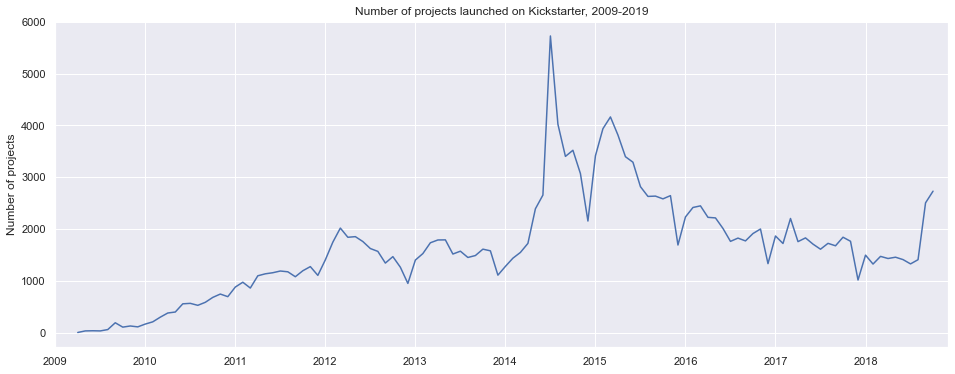

In [36]:
plt.figure(figsize=(16,6))
df['launched_at'] = pd.to_datetime(df['launched_at'])
df.set_index('launched_at').category.resample('M').count().plot() #resampling time series to Months
plt.xlim('2009-01-01', '2018-12-31')
plt.xlabel('')
plt.ylabel('Number of projects')
plt.title('Number of projects launched on Kickstarter, 2009-2019')
plt.show()

Launched in 2009, Kickstarter has been growing heavily until today, especially with their huge expansion in 2014, passing half of a billion dollars in pledges. In 2012, Kickstarter expanded to other countries and has been growing in launches until 2014 rapidly, and slightly decreasing after this peak.

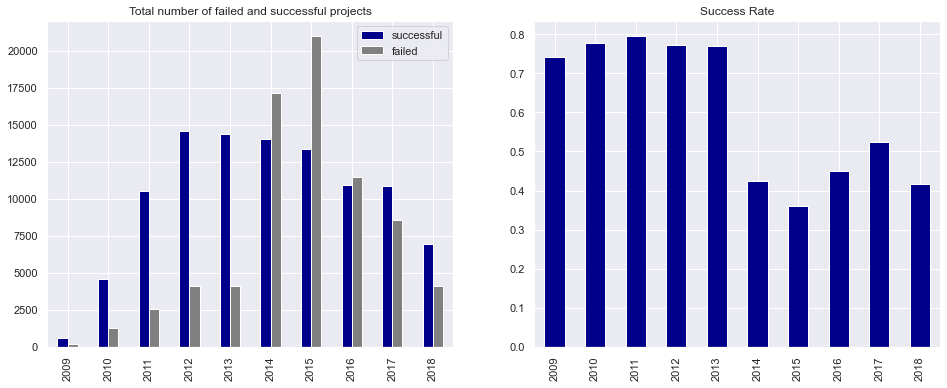

In [37]:
year_df = df.set_index('launched_at').state
year_df = pd.get_dummies(year_df).resample('YS').sum()
year_df1 = year_df[['successful', 'failed']]
year_df1['launched_at'] = year_df1.index
year_df1['launched_at'] = pd.DatetimeIndex(year_df1['launched_at']).year

fig, ax = plt.subplots(1,2, figsize=(16,6))
year_df1[['successful', 'failed']].plot.bar(ax=ax[0], color=['darkblue', 'grey'])
ax[0].set_title('Total number of failed and successful projects')
ax[0].set_xlabel('')
ax[0].set_xticklabels(year_df1['launched_at'])


year_df1["successful"].div(year_df.sum(axis=1), axis=0).plot(kind='bar', ax=ax[1], color='darkblue') # Normalizes counts across rows
ax[1].set_title('Success Rate')
ax[1].set_xlabel('')
ax[1].set_xticklabels(year_df1['launched_at'])

plt.show()

The left image depicts the total number of failed and successful projects, which indicated that the total number of failures and successes have been decreading since 2013. With the page being flooded in 2014 and 2015, the number of failed projects exceed the number of overall successful project. The right image shows the success rate plummeting with the year 2014. That is due to a higher overall number of projects.

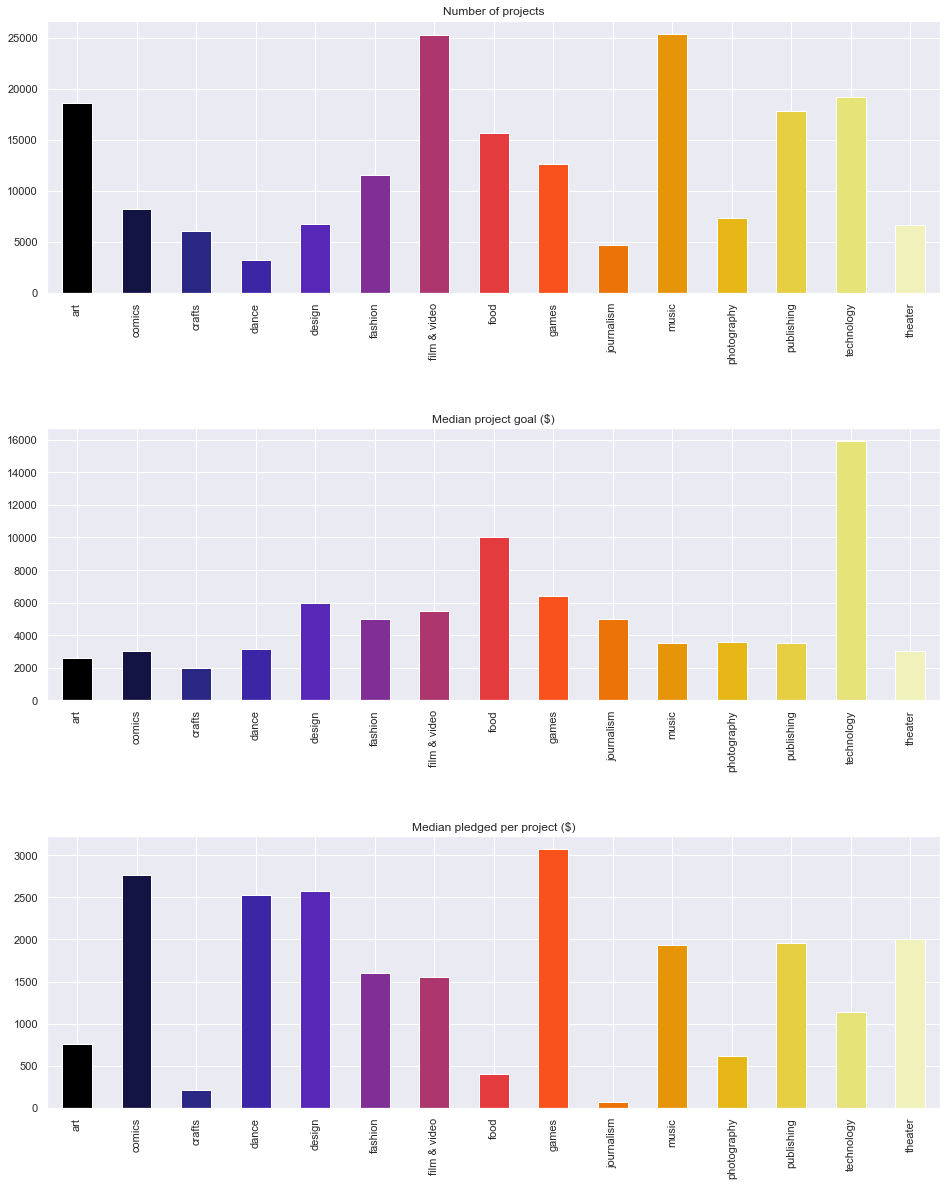

In [38]:
fig, ((ax1, ax2, ax3)) = plt.subplots(3, 1, figsize=(16,20))
color = cm.CMRmap(np.linspace(0, 1, 16,df.category.nunique()))

df.groupby('category').category.count().plot(kind='bar', ax=ax1, color=color)
ax1.set_title('Number of projects')
ax1.set_xlabel('')

df.groupby('category').usd_goal.median().plot(kind='bar', ax=ax2, color=color)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

df.groupby('category').usd_pledged.median().plot(kind='bar', ax=ax3, color=color)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')

fig.subplots_adjust(hspace=0.5)
plt.show()

The illustrations above aim to highlight the differences among the 15 different categories. Film&Video is the most used category, closely followed by music. Art, publishing and technology take the third place. However, technology has the highest median project goal. Design is the category with the highest pledged amount per project.

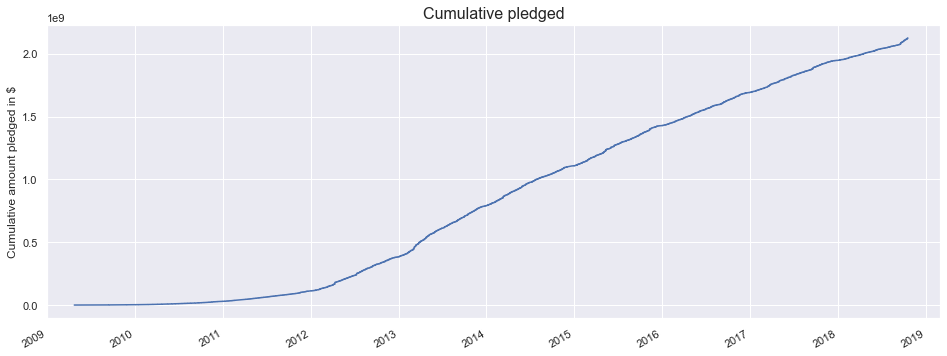

In [39]:
plt.figure(figsize=(16,6))
df.set_index('launched_at').sort_index().usd_pledged.cumsum().plot()
plt.xlim('2009-01-01', '2019-02-28') # Limiting to whole months
plt.xlabel('')
plt.ylabel('Cumulative amount pledged in $', fontsize=12)
plt.title('Cumulative pledged', fontsize=16)
plt.show()

The cumulative pledged figure shows the total of pledged amounts for each year 2009-2019. We can see two phases, until 2012 the cumulative amount pledged increased slightly and after Kickstarter's expansion to multiple other countries in 2012, the graph has been moving visibily stronger upwards.

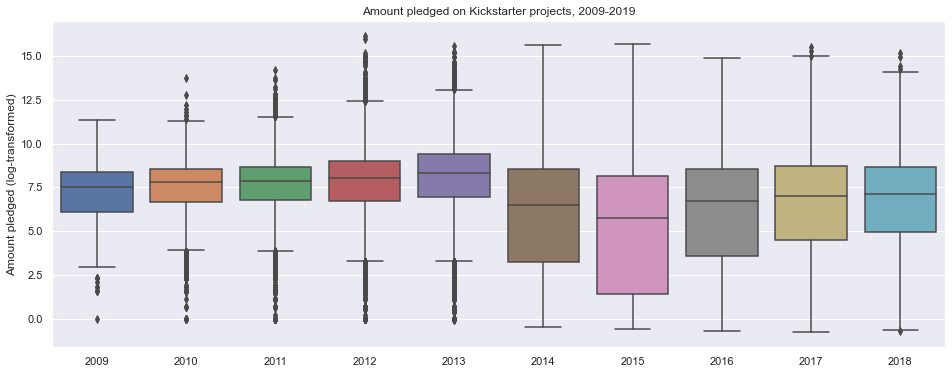

In [40]:
plt.figure(figsize=(16,6))
sns.boxplot(df.launched_at.dt.year, np.log(df.usd_pledged))
plt.xlabel('')
plt.ylabel('Amount pledged (log-transformed)',) #Log-transforming to make the trend clearer, as the distribution is heavily positively skewed
plt.title('Amount pledged on Kickstarter projects, 2009-2019')
plt.show()

The change in 2014 is visible in the box-plot above, as well. We can see a greater variation in amounts pledged starting in 2014, with lower median amounts than before 2014, but generally higher mean amounts due to some very large projects. This leads us to the expansion in 2014 again.

Text(0.5, 1.0, 'Top 10 lengths of campaign days')

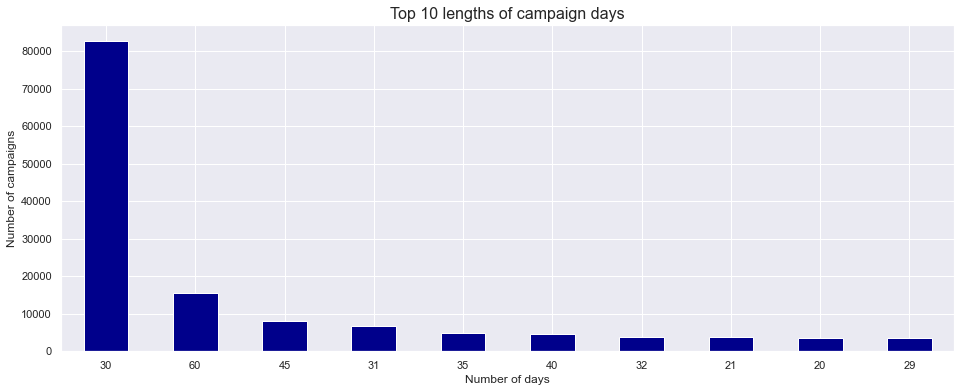

In [41]:
plt.figure(figsize=(16,6))
top10_camapaign_days = df["campaign_days"].value_counts(ascending=False).iloc[:10]
top10_camapaign_days.plot(kind="bar",color='darkblue')
plt.xticks(rotation='horizontal')
plt.xlabel('Number of days', fontsize=12)
plt.ylabel('Number of campaigns', fontsize=12)
plt.title('Top 10 lengths of campaign days',fontsize=16)

In [42]:
print("The mean of campagin days is", int(round(df.campaign_days.mean(),0)))

The mean of campagin days is 34


And as the picture above indicates, by far the most common length of campagin days is 30 days.

Text(0.5, 1.0, 'Top 10 number of days between creation and launch')

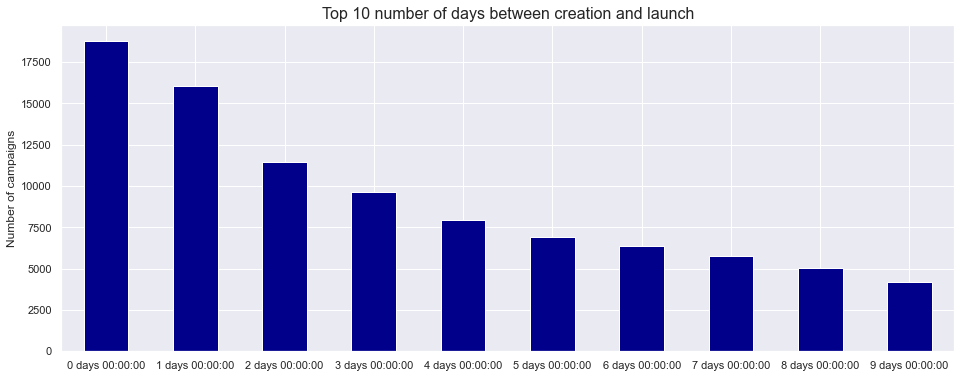

In [43]:
creation_launch_df = df[["created_at","launched_at"]]
creation_launch_df['created_at'] = pd.to_datetime(creation_launch_df['created_at'])
creation_launch_df['launched_at'] = pd.to_datetime(creation_launch_df['launched_at'])
creation_launch_df ["delta"] = creation_launch_df['launched_at'] - creation_launch_df['created_at']
plt.figure(figsize=(16,6))
creation_launch_df = creation_launch_df["delta"].value_counts(ascending=False).iloc[:10]
creation_launch_df.plot(kind="bar",color='darkblue')
plt.xticks(rotation='horizontal')
plt.ylabel('Number of campaigns', fontsize=12)
plt.title('Top 10 number of days between creation and launch',fontsize=16)

The image above shows that most of the time the creator is launching his/her project at the same day of creation. After that with every extra day between between creation day and launch, the number of projects decrease. That could be due to some final adjustments which appear in the last day but can be solved rather quickly.

Text(0.5, 1.0, 'Most used Launch Days')

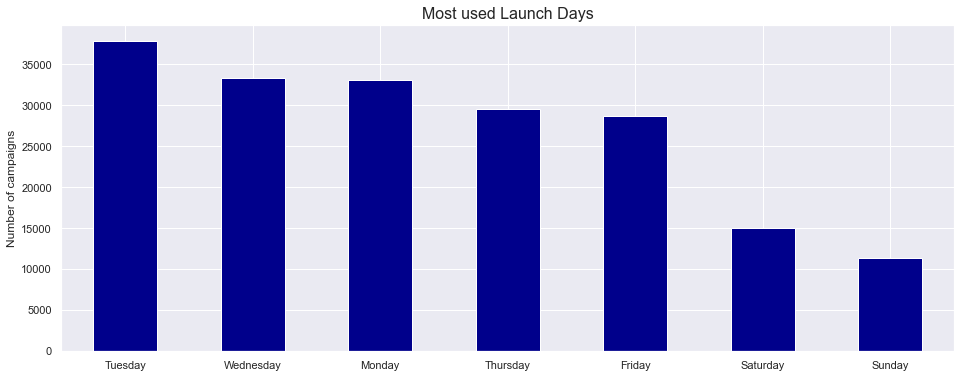

In [44]:
plt.figure(figsize=(16,6))
launch_day_df = df['launch_day'].value_counts(ascending=False)
launch_day_df.plot(kind="bar",color='darkblue')
plt.xticks(rotation='horizontal')
plt.ylabel('Number of campaigns', fontsize=12)
plt.title('Most used Launch Days',fontsize=16)

Above, we can see that Saturday and Sunday appear to stand out as a unfavored option for launching a project. In the weekdays, launching a kickstarter campagin is more common with a slight difference in the weekdays.

Text(0.5, 1.0, 'Most used Launch Months')

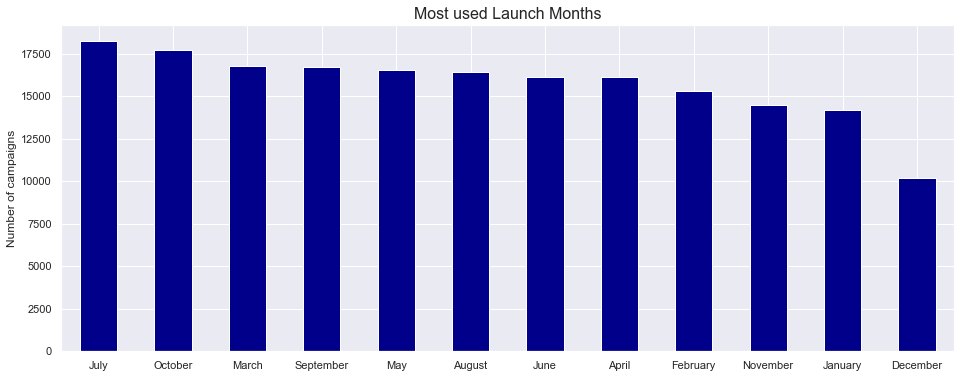

In [45]:
plt.figure(figsize=(16,6))
launch_month_df = df['launch_month'].value_counts(ascending=False)
launch_month_df.plot(kind="bar",color='darkblue')
plt.xticks(rotation='horizontal')
plt.ylabel('Number of campaigns', fontsize=12)
plt.title('Most used Launch Months',fontsize=16)

The image above underscores that the months around December are not favored as a month to launch a project. January and November are the two least favored months to launch after December itself. That might be due to the Christmas period before and after December.

<AxesSubplot:title={'center':'Frequency of Slug length'}>

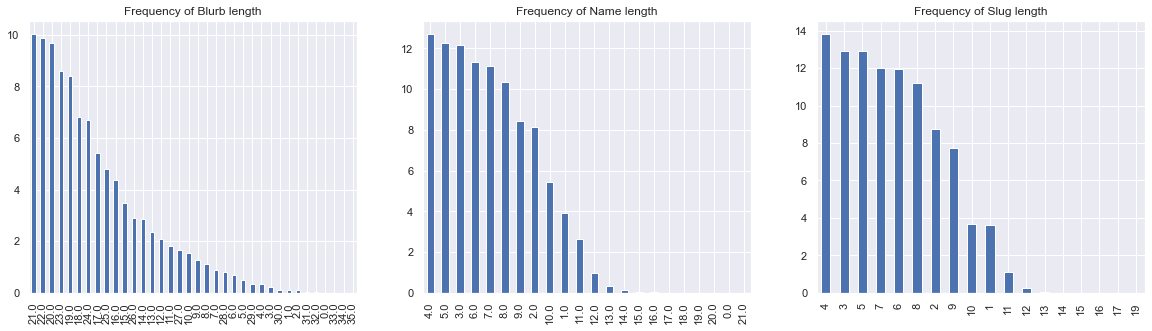

In [47]:
# Frequencies of word length
freq_name = df['name_len'].value_counts(normalize=True).mul(100)
freq_slug = df['slug_len'].value_counts(normalize=True).mul(100)
freq_blurb = df['blurb_len'].value_counts(normalize=True).mul(100)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
freq_blurb.plot(ax = axes[0], kind='bar', title = 'Frequency of Blurb length')
freq_name.plot(ax = axes[1], kind='bar', title = 'Frequency of Name length')
freq_slug.plot(ax = axes[2], kind='bar', title = 'Frequency of Slug length')


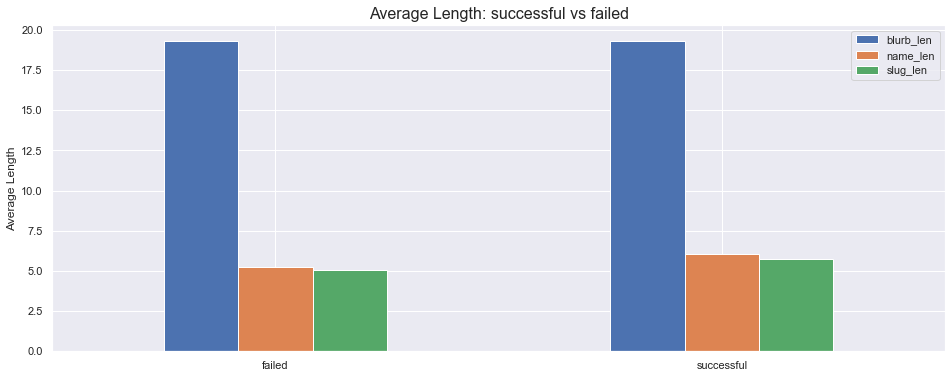

In [427]:
ex1 = df[['state','blurb_len', 'name_len', "slug_len"]]
ex1.drop(ex1.index[ex1['state'] == 'live'], inplace = True)
ex1.drop(ex1.index[ex1['state'] == 'canceled'], inplace = True)
ex1.drop(ex1.index[ex1['state'] == 'suspended'], inplace = True)
cat = ex1.groupby(['state']).mean()

cat.plot(kind="bar",figsize=(16,6))
plt.xlabel('')
plt.xticks(rotation='horizontal')
plt.ylabel('Average Length', fontsize=12)
plt.title('Average Length: successful vs failed', fontsize=16)
plt.show()

The image displays the length of blurb, name and slug for failed and successful projects. We can see that the difference between each length for failed and successfull project does not vary significantly. Hence, this does not influence the further analysis.

### Natural Language Processing

In the analysis below we will analyze the text variables (name, blurb, slug) through natural language processing techniques. 

First of all we will preprocess text variables and clean them following these steps:
- Sentence Segmentation
- Lowercase 
- Remove extra whitespaces, punctuation special characters and numbers. Here, we assume that non-character words and numbers play a minimal role in prediction. 
- Expansion of the short form definitions
- Word tokenization
- Lemmatization of the words, to get them into their root words
- Remove Stop Words

In [413]:
# Contraction/Expansion of short words
contractions_dict = {
    'didn\'t': 'did not',
    'don\'t': 'do not',
    "aren't": "are not",
    "can't": "cannot",
    "cant": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "didnt": "did not",
    "doesn't": "does not",
    "doesnt": "does not",
    "don't": "do not",
    "dont" : "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i had",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'm": "i am",
    "im": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'll": "it will",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "that's": "that is",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who's": "who is",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have"
    }

In [414]:
lemmatizer = WordNetLemmatizer()

contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)

# Normalize words
def normalize_document(d):
    d = str(d).lower() # lower case
    d = expand_contractions(d) #apply contraction-expansion function
    d = re.sub(r'[^a-zA-Z\s]', '', d, re.I|re.A) # substitute any character that is not a-z or A-Z and remove whitespaces
    d = d.strip()
    tokens = nltk.word_tokenize(d) # tokenize document
    words =[lemmatizer.lemmatize(word) for word in tokens if word not in set(stopwords.words('english'))] # lemmatization
    d = ' '.join(words) 
    return d

df['blurb_clean'] = df['blurb'].apply(normalize_document)
df['name_clean'] = df['name'].apply(normalize_document)
df['slug_clean'] = df['slug'].str.replace("-", " ").apply(normalize_document) 

# Combine text variables
df['combined_text'] = df['blurb_clean'] + df['slug_clean'] + df['name_clean']

#### Topic Modeling and Document Clustering

To explore Textual data, we also used LDA. Latent Dirichlet Allocation is an unsupervised machine learning model in the natural language processing arena, mainly used for topic modeling and clustering text documents by similarity. By using the terms in each document and their relative frequency, the ones thought to be similar are grouped together. LDA doesn’t grasp the content or context of the documents in this cluster but just assigns an integer to each topic. Looking at each topic cluster we can get an idea of what they represent. Topic modeling determines the most useful terms using relevance metric, which denotes the degree to which a term appears in a particular topic to the exclusion of others
 Λ is the weight assigned to the probability of a term in a topic relative to its lift

In [406]:
from sklearn.decomposition import LatentDirichletAllocation
vect = CountVectorizer(max_features=10000)
X = vect.fit_transform(df['combined_text'].values)
lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0)

document_topics = lda.fit_transform(X)

In [ ]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, X, vect)

<img src="lda.jpg" alt="Lda" width="900"/>

By taking a look at Topic 1 we can see this probably refers to the Movie Industry with words like film, series, story, comedy, and horror. Its nearest topic, 7, probably refers to Books and Art with words like book, poetry, collection, print, art, poster, etc. All the topics that are near to each other, in some senses are part of the Art Category.  Topic 9 is far from the others, and it relates to the game Industry, while topic 3 and 5 refer to Music Industry. These topics mirror the importance of certain categories and represent useful insights for creators since they can see and evaluate the most used keywords in specific categories. Each creator, based on their idea, should analyze.

#### Word Cloud

In [50]:
word_cnts = np.asarray(X.sum(axis=0)).ravel().tolist()  # for each word in column, sum all row counts
feature_names = vect.get_feature_names()
word_counts = pd.DataFrame({'word': feature_names, 'count': word_cnts})
word_freq = pd.Series(word_counts['count'])
word_freq.index = word_counts ['word']
text_freq = word_freq.to_dict()
word_counts.sort_values('count', ascending=False)[:20]

,word,count
6038,new,29823
4264,help,21387
628,art,18712
1158,book,18228
197,album,17755
5923,music,15193
3525,first,15000
3486,film,14756
7008,project,14616
9890,world,13771


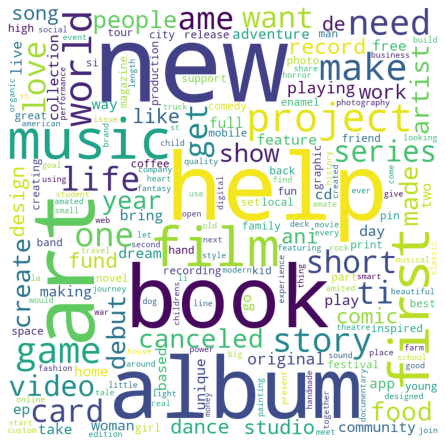

In [51]:
wordcloud = WordCloud(width=800, height=800, max_font_size=200, background_color="white").generate_from_frequencies(text_freq)
                    
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

As we can see from the Wordmap, 6 words seem to appear more frequent: help, new, art, album, music and book. This most likely stems from the fact that 4 of the 5 most frequent categories are: Art, Film&Video, Music and Publishing. Those categories have a high correlation to the aforementioned words.

We experimented with different combinations of NLP techniques including Bag of Words and TFIDF Vectorizer to understand which works best for text variables. In the following models we are going to use CountVectorizer because it performs better.

### Preprocessing and Feature Selection

Some features were initially retained for Exploratory Data analysis and Visualization purposes, but were then dropped in order to use machine learning models. These included features that are related to outcomes (e.g. the amount pledged, number of backers, spotlight) rather than to the properties of the project itself at the time of creation (e.g. category, goal, length of campaign). Other variables related to currencies and exchange rate for example will be dropped since not relevant to explain the outcome of a project. More explanations can be found below.

Given the size of the sample and the available features, feature selection options were limited. 

Aside from the text features explored before, train-test sets for the modeling phase include: 
-	Numerical Variables: goal in usd dollars, length of blurb and name of the project, days from creation to launch, campaign days. 
-	Categorical variables: category, subcategory, country, day and month of the launch and of the deadline, if the project has a staff pick badge or not.

Given that we have a huge number of projects (152'789) we are going to train our models with a **subsample** (30'000) of the whole dataset for problems due to the run time of the models and capacity of our computers.

In [320]:
df_transformed = df.drop(['project_id', 'name', 'slug', 'slug_len', 'blurb', 'blurb_clean', 'name_clean','slug_clean','url','subcategory_id',
                         'created_at', 'nation','city', 'launched_at','deadline','nr_backers', 'pledge_per_backer','pledged',
                         'currency', 'usd_pledged', 'current_currency', 'fx_rate', 'state_changed_at','disable_communication', 
                         'is_starrable', 'spotlight'], axis=1)


df_transformed=df_transformed.loc[df_transformed['state'].isin(["failed","successful"])]
df_transformed=df_transformed.loc[df_transformed['project_status'].isin(["inactive"])]

df_transformed['staff_pick'] = df_transformed['staff_pick'].astype(str)

In [321]:
df_transformed_sample=df_transformed.sample(n=30000)

In [322]:
df_transformed_sample

,state,name_len,blurb_len,category,subcategory,country,launch_day,launch_month,creation_to_launch_days,deadline_day,deadline_month,campaign_days,usd_goal,project_status,staff_pick,combined_text
21553,successful,4.0,20.0,games,Video Games,US,Wednesday,May,176,Saturday,May,17,78715.0,inactive,True,turnbased strategy game two player spying brib...
83448,successful,8.0,25.0,fashion,Fashion,US,Tuesday,February,96,Thursday,March,30,3000.0,inactive,False,eyecatching precision made mini amalist wallet...
33826,failed,5.0,23.0,film & video,Television,US,Tuesday,August,3,Tuesday,September,42,13500.0,inactive,False,fund filming reality game show winner last one...
114481,successful,4.0,21.0,art,Illustration,US,Monday,January,1,Friday,March,32,250.0,inactive,False,illustrate friendly expressive monster portrai...
8215,successful,11.0,18.0,comics,Comics,US,Tuesday,May,88,Thursday,June,30,6069.0,inactive,False,anthology comic music package wstories ti ame ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83468,successful,3.0,20.0,design,Design,US,Monday,April,50,Wednesday,May,30,450.0,inactive,False,glass ever need alcohol wine tea coffee lemona...
123736,failed,2.0,14.0,food,Restaurants,US,Monday,March,2,Wednesday,April,30,25000.0,inactive,False,amazing restaurant natural healthy ingredient ...
64586,successful,2.0,18.0,journalism,Audio,SE,Tuesday,December,14,Friday,January,45,6624.5,inactive,False,efter avsnitt gjorda p enbart entusiasm behver...
52467,failed,6.0,24.0,journalism,Print,US,Monday,March,2,Tuesday,March,8,20250.0,inactive,False,year continuous denial trying get billboard av...


We are going to compute two different versions of our pipeline, one including the combined text variable and one without it. Pipelines are created to select and preprocess numeric, text, & categorical columns. 
-	Numeric pipeline: uses SimpleImputer to fill NaN values  with 0’s (instead of the mean, etc.) as using the mean would have been misleading. For instance, some campaigns could have taken less time to launch or much more. 
-	Categorical pipeline: utilized SimpleImputer and OneHotEncoder. 
-	Text pipeline: Count Vectorizer.

In [323]:
get_text_data = FunctionTransformer(lambda x: x['combined_text'], 
                                    validate = False) 

get_numeric_data = FunctionTransformer(lambda x: x[['blurb_len','name_len', 'creation_to_launch_days','campaign_days','usd_goal']], 
                                       validate = False)

get_categorical_data = FunctionTransformer(lambda x: x[["category", "subcategory", "country","launch_day","launch_month", 
                                                        "deadline_day", "deadline_month","staff_pick"]], validate = False)

In [324]:
numeric_pipeline = Pipeline([('selector', get_numeric_data),
                             ('imputer', SimpleImputer(missing_values=np.nan, strategy='constant',fill_value =0)),
                             ("scaler", StandardScaler())
                            ])

text_pipeline = Pipeline([('selector',get_text_data),
                         ('vectorizer',CountVectorizer())])

categorical_pipeline = Pipeline([('selector',get_categorical_data),
                                 ('imputer', SimpleImputer(missing_values=np.nan, strategy='constant',fill_value='No Value')),
                                ('onehot',OneHotEncoder(handle_unknown='ignore'))])

In [325]:
#Without text feature

preprocessor = FeatureUnion([
    ('numeric', numeric_pipeline),
    ('categorical', categorical_pipeline)
])

set_config(display="diagram")
        
X = df_transformed_sample.drop('state', axis=1)
y = df_transformed_sample.state.replace({'failed' : 0, 'successful': 1})

#Run Column Transformer
X_transformed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed,y,test_size=0.2,shuffle=True, random_state=123)

In [326]:
preprocessor

FeatureUnion(transformer_list=[('numeric',
                                Pipeline(steps=[('selector',
                                                 FunctionTransformer(func=<function <lambda> at 0x7ff1675b8ee0>)),
                                                ('imputer',
                                                 SimpleImputer(fill_value=0,
                                                               strategy='constant')),
                                                ('scaler', StandardScaler())])),
                               ('categorical',
                                Pipeline(steps=[('selector',
                                                 FunctionTransformer(func=<function <lambda> at 0x7ff153137310>)),
                                                ('imputer',
                                                 SimpleImputer(fill_value='No '
                                                                          'Value',
                                                               strategy='constant')),
                                                ('onehot',
                                                 OneHotEncoder(handle_unknown='ignore'))]))])

In [327]:
#With text feature

preprocessor_text = FeatureUnion([
    ('numeric', numeric_pipeline),
    ('categorical', categorical_pipeline),
    ('text', text_pipeline)
])

set_config(display="diagram")
        
X = df_transformed_sample.drop('state', axis=1)
y = df_transformed_sample.state.replace({'failed' : 0, 'successful': 1})

#Run Column Transformer
X_transformed_text = preprocessor_text.fit_transform(X)

X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(X_transformed_text,y,test_size=0.2,shuffle=True, random_state=123)

In [328]:
preprocessor_text

FeatureUnion(transformer_list=[('numeric',
                                Pipeline(steps=[('selector',
                                                 FunctionTransformer(func=<function <lambda> at 0x7ff1675b8ee0>)),
                                                ('imputer',
                                                 SimpleImputer(fill_value=0,
                                                               strategy='constant')),
                                                ('scaler', StandardScaler())])),
                               ('categorical',
                                Pipeline(steps=[('selector',
                                                 FunctionTransformer(func=<function <lambda> at 0x7ff153137310>)),
                                                ('imputer',
                                                 SimpleImputer(fill_value='No '
                                                                          'Value',
                                                               strategy='constant')),
                                                ('onehot',
                                                 OneHotEncoder(handle_unknown='ignore'))])),
                               ('text',
                                Pipeline(steps=[('selector',
                                                 FunctionTransformer(func=<function <lambda> at 0x7ff160e4cd30>)),
                                                ('vectorizer',
                                                 CountVectorizer())]))])

This is pretty much the reason why we decided to subset our dataset and build two different pipelines:

<img src="long-pipelines.jpg" alt="Long Pipelines" width="700"/>

# MODELING

The central question every entrepreneur and creator has to ask himself before publishing his project is: “Is my project feasible?” For a project to be successful, it requires upfront financing. Kickstarter enables creators via crowdfunding to collect financial means of pre-sales to kickstart the project. The platform has a central mechanism to distinguish successful from failed projects, the difference between the pledged amount versus the requested amount. In the following models, we are processing the given feature every project has determined before the launch to predict whether the project is likely to collect the requested amount.

## Overview

Our models are designed to perform a binary classification between successful and unsuccessful. If the probability of a project succeeding is >50% a project will be classified as successful. In the training process, we train different models in different variations to compare their basic performance. Subsequently, we perform **hyperparameter-tuning** to enable the models to predict the state of a project even better. As our central evaluation metric, we use the F1 score, due to its balance of false-positive and false-negative predicted values. For creators, it is most important to get a realistic estimation of whether the project will fail or not for this reason we decided that a harmonic mean between precision and recall is most reasonable.

We are comparing the following models to predict the success of a project:

1.	Logistic Regression
2.	Logistic Regression with TruncatedSVD
3.	Random Forest
4.	XGBoost

## Logistic Regression

Logistic regression is a classification algorithm, used when the value of the target variable is categorical in nature. Logistic regression is most commonly used when the data in question has binary output, so when it belongs to one class or another, or is either a 0 or 1.

### Basic Model Logistic Regression

In [64]:
#code to plot the confusion matrix

def plot_cf(y_true, y_pred, class_names=None, model_name=None):
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    plt.grid(b=None)
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

Basic Model Logistic Regression without text variable:


Classification report:
              precision    recall  f1-score   support

           0     0.7686    0.8806    0.8208      2889
           1     0.8717    0.7538    0.8085      3111

    accuracy                         0.8148      6000
   macro avg     0.8202    0.8172    0.8146      6000
weighted avg     0.8221    0.8148    0.8144      6000

Time taken to run: 0.11 minutes


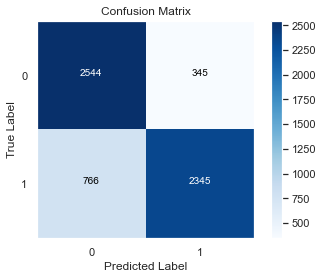

In [80]:
lr_start = time.time()

# Fitting a logistic regression model with default parameters
logistic_regression = LogisticRegressionCV(cv=5)
logistic_regression.fit(X_train,y_train)

# Making predictions
y_pred_lr = logistic_regression.predict(X_test)

lr_end = time.time()

# Logistic regression scores
print("\nClassification report:")
print(classification_report(y_test, y_pred_lr, digits=4))
print(f"Time taken to run: {round((lr_end - lr_start)/60,2)} minutes")
plot_cf(y_test, y_pred_lr)

Basic Model Logistic Regression with text variable:


Classification report:
              precision    recall  f1-score   support

           0     0.7839    0.8311    0.8068      2889
           1     0.8338    0.7872    0.8099      3111

    accuracy                         0.8083      6000
   macro avg     0.8089    0.8091    0.8083      6000
weighted avg     0.8098    0.8083    0.8084      6000

Time taken to run: 0.59 minutes


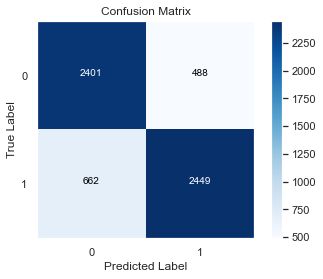

In [81]:
lr_start_text = time.time()

logistic_regression_text = LogisticRegressionCV(cv=5)
logistic_regression_text.fit(X_train_text,y_train_text)

y_pred_lr_text = logistic_regression_text.predict(X_test_text)

lr_end_text = time.time()

print("\nClassification report:")
print(classification_report(y_test_text, y_pred_lr_text, digits=4))
print(f"Time taken to run: {round((lr_end_text - lr_start_text)/60,2)} minutes")
plot_cf(y_test_text, y_pred_lr_text)

**Interpretation**:
As this is a rather simple model, we already reach an F1-Score of 0.8148 in the model without the text variable. This supports our initial hypothesis that the dataset can be effective to predict the success of a project. As we can see, the F1-score reached in the model with the text variable is slightly lower: this means that the text variable does not add additional value to the model.
    

### Hyperparameter Tuning Logistic Regression using GridSearch

In addition to our basic model, we perform hyperparameter tuning in order to improve our model in detecting the outcome of a project. With cross-validated GridSearch, we run a variety of regularization types, penalty values and solver algorithms to determine the most effective hyperparameters of the model. 

Without text variable:

In [99]:
lr_start_gs = time.time()

logreg=LogisticRegression()

parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear']}
    
logreg_cv=GridSearchCV(logreg, param_grid = parameters, scoring = 'f1')
logreg_cv.fit(X_train,y_train)
    
lr_end_gs = time.time()

print("Tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print(f"Time taken to run: {round((lr_end_gs - lr_start_gs)/60,1)} minutes")

Tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
Time taken to run: 1.6 minutes


Time taken to run: 0.02 minutes

Classification report:
              precision    recall  f1-score   support

           0     0.7683    0.8806    0.8206      2889
           1     0.8717    0.7535    0.8083      3111

    accuracy                         0.8147      6000
   macro avg     0.8200    0.8170    0.8145      6000
weighted avg     0.8219    0.8147    0.8142      6000

F1-Score Train: 0.815
F1-Score Test: 0.8142
Cross validation score:  0.8057


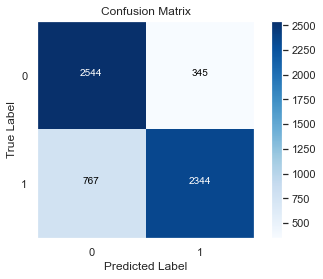

In [109]:
best_lr_start = time.time()

best_lr = LogisticRegression(C=100.0, solver="liblinear", penalty="l1")
best_lr.fit(X_train,y_train)

best_y_lr_pred_train = best_lr.predict(X_train)
best_y_lr_pred_test = best_lr.predict(X_test)

best_lr_end = time.time()

print(f"Time taken to run: {round((best_lr_end - best_lr_start)/60,2)} minutes")

print("\nClassification report:")
print(classification_report(y_test, best_y_lr_pred_test, digits=4))
plot_cf(y_test, best_y_lr_pred_test)

print("F1-Score Train: "+ str(round(f1_score(y_train, best_y_lr_pred_train, average='weighted'),4)))
print("F1-Score Test: "+str(round(f1_score(y_test, best_y_lr_pred_test, average='weighted'),4)))

#CrossVal Score
best_lr_cv_mean=np.mean(cross_val_score(best_lr, X_test, y_test, cv=10)).round(4)
print("Cross validation score: ", best_lr_cv_mean)

With text variable:

In [111]:
lr_start_gs_text = time.time()

logreg=LogisticRegression()

parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],}
    
logreg_cv_text=GridSearchCV(logreg, param_grid = parameters, scoring ="f1")
logreg_cv_text.fit(X_train_text,y_train_text)
    
lr_end_gs_text = time.time()

print("Tuned hpyerparameters :(best parameters) ",logreg_cv_text.best_params_)
print(f"Time taken to run: {round((lr_end_gs_text - lr_start_gs_text)/60,1)} minutes")

Tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Time taken to run: 1.8 minutes


Time taken to run: 0.01 minutes

Classification report:
              precision    recall  f1-score   support

           0     0.7726    0.8820    0.8237      2889
           1     0.8738    0.7589    0.8123      3111

    accuracy                         0.8182      6000
   macro avg     0.8232    0.8204    0.8180      6000
weighted avg     0.8251    0.8182    0.8178      6000

F1-Score Train: 0.81773946
F1-Score Test: 0.81777998
Cross validation score:  0.8057


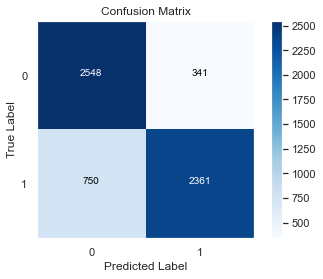

In [113]:
best_lr_start_text = time.time()

best_lr_text = LogisticRegression(C=0.1, solver="liblinear", penalty="l1")
best_lr_text.fit(X_train_text,y_train_text)

best_y_lr_pred_train_text = best_lr_text.predict(X_train_text)
best_y_lr_pred_test_text = best_lr_text.predict(X_test_text)

best_lr_end_text = time.time()

print(f"Time taken to run: {round((best_lr_end_text - best_lr_start_text)/60,2)} minutes")

print("\nClassification report:")
print(classification_report(y_test_text, best_y_lr_pred_test_text, digits=4))
plot_cf(y_test_text, best_y_lr_pred_test_text)

print("F1-Score Train: "+ str(round(f1_score(y_train_text, best_y_lr_pred_train_text, average='weighted'),8)))
print("F1-Score Test: "+str(round(f1_score(y_test_text, best_y_lr_pred_test_text, average='weighted'),8)))

#CrossVal Score
best_lr_text_cv_mean=np.mean(cross_val_score(best_lr, X_test, y_test, cv=10)).round(4)
print("Cross validation score: ", best_lr_text_cv_mean)

**Interpretation**: With an F1-Score of 0.8182 on the model with the text variable, we can assume that our hyperparameter-tuning was successful and improved the model. Overall, we achieved with this model a meaningful indicator of whether a project will reach its pledged goal with given features.

## Logistic Regression with TruncatedSVD

With a dataset containing more than 200.000 entries, runtime, especially for complex models, is a real issue. For scalability reasons, we can determine the most useful features in order to build models based on that. TruncatedSVD, or singular-value decomposition is a dimensionality-reduction technique that reduces the matrix into its components to simplify the calculation. Thus, the computation and training are accelerated while maintaining the level of performance.

We have been able to compute the TruncatedSVD only in the processed data without the text variable, since the actual number of features in the processed data containing the text variable is equal to 96907 and it takes too long to run with our computers:

In [71]:
X_train.shape[1]

241

In [72]:
tsvd = TruncatedSVD(n_components=X_train.shape[1]-1)
X_tsvd = tsvd.fit(X_train)

In [73]:
tsvd_var_ratios = tsvd.explained_variance_ratio_

In [74]:
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

In [75]:
select_n_components(tsvd_var_ratios, 0.95)

84

In [170]:
# Define the pipeline
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
steps = [('svd', TruncatedSVD(n_components=84, n_iter=20)), ('m', LogisticRegression(C=100.0, solver="liblinear", penalty="l1", max_iter=5000))]
model = Pipeline(steps=steps)

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('F1-score: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

F1-score: 0.751 (0.010)


The model shows us that dimensionality reduction leads to an insignificant loss in performance of 0.07 on the F1-Score of the test data. With this process we passed from 241 features to 84 components, keeping an explained variance of 0.95.

## Random Forest

Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It consists of a large number of individual decision trees that operate as an ensemble. In the process, each individual tree gives a class prediction and with a majority vote the class is determined. The algorithm leverages a simple but powerful concept, the wisdom of the crowd. In general, Random Forest is a good model to handle large datasets effectively while providing a high level of accuracy compared to regular decision tree algorithms.

### Basic Model Random Forest

Without text variable:

Time taken to run: 0.2 minutes

Accuracy score:
0.8236666666666667

Classification report:
              precision    recall  f1-score   support

           0     0.7962    0.8519    0.8231      2889
           1     0.8529    0.7975    0.8243      3111

    accuracy                         0.8237      6000
   macro avg     0.8245    0.8247    0.8237      6000
weighted avg     0.8256    0.8237    0.8237      6000



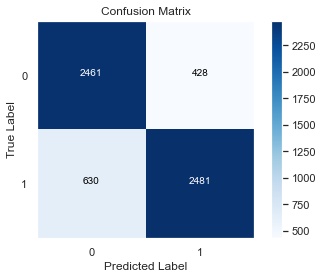

In [128]:
rf_start = time.time()

rnd_clf = RandomForestClassifier()

rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)

rf_end = time.time()

print(f"Time taken to run: {round((rf_end - rf_start)/60,1)} minutes")
print("\nAccuracy score:")
print(accuracy_score(y_test, y_pred))
print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=4))


plot_cf(y_test, y_pred)

With text variable:

Time taken to run: 1.4 minutes

Accuracy score:
0.8166666666666667

Classification report:
              precision    recall  f1-score   support

           0     0.8009    0.8242    0.8124      2889
           1     0.8322    0.8097    0.8208      3111

    accuracy                         0.8167      6000
   macro avg     0.8165    0.8169    0.8166      6000
weighted avg     0.8171    0.8167    0.8167      6000



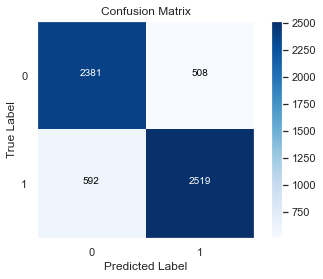

In [131]:
rf_start_text = time.time()

rnd_clf_text = RandomForestClassifier()

rnd_clf_text.fit(X_train_text, y_train_text)
y_pred_rnd_text = rnd_clf_text.predict(X_test_text)

rf_end_text = time.time()

print(f"Time taken to run: {round((rf_end_text - rf_start_text)/60,1)} minutes")
print("\nAccuracy score:")
print(accuracy_score(y_test_text, y_pred_rnd_text))
print("\nClassification report:")
print(classification_report(y_test_text, y_pred_rnd_text, digits=4))


plot_cf(y_test_text, y_pred_rnd_text)

**Interpretation**: With a F1-score of 0.8237 in the model with text, we grasp that Random Forest performs similarly well compared to the Logistic Regression models. As before, the basic model performs better without including the text variable. 

### Hyperparameter Tuning Random Forest using GridSearch

Similarly to hyperparameter tuning the Logistic Regression Model, we’re applying cross-validated GridSearch to boost the performance of the model. Thus, we are computing the optimal hyperparameters, such as the max_depth of the model, the minimum sample split, and the number of estimators.

Without text variable:

In [133]:
# Using GridSearchCV to test multiple different parameters

rf_start = time.time()

rnd_clf = RandomForestClassifier()

params_rf = {'n_estimators': [100, 200, 400],
             'max_depth': [10, 20, 30, 40],
             'min_samples_split':[0.001, 0.01, 1, 2]}

f1 = make_scorer(f1_score , average='macro')

grid_rf = GridSearchCV(estimator = RandomForestClassifier(), param_grid = params_rf, cv=5, scoring = f1)

grid_rf.fit(X_train, y_train)

rf_end = time.time()

rf_best_score = grid_rf.best_score_
rf_best_params = grid_rf.best_params_

print(f"Time taken to run: {round((rf_end - rf_start)/60,1)} minutes")
print("Best parameters:", rf_best_params)

Time taken to run: 19.1 minutes
Best parameters: {'max_depth': 40, 'min_samples_split': 0.001, 'n_estimators': 400}


Time taken to run: 0.4 minutes

Classification report:
              precision    recall  f1-score   support

           0     0.7992    0.8515    0.8245      2889
           1     0.8532    0.8014    0.8265      3111

    accuracy                         0.8255      6000
   macro avg     0.8262    0.8264    0.8255      6000
weighted avg     0.8272    0.8255    0.8255      6000



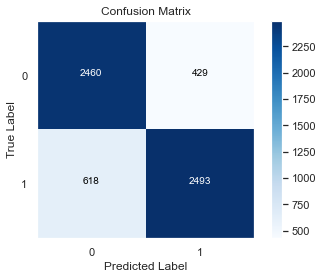

In [135]:
rf_best_start = time.time()

best_rf = RandomForestClassifier(max_depth=40, min_samples_split=0.001, n_estimators=400)

best_rf.fit(X_train, y_train)

best_y_pred = best_rf.predict(X_test)

rf_best_end = time.time()

print(f"Time taken to run: {round((rf_best_end - rf_best_start)/60,1)} minutes")
print("\nClassification report:")
print(classification_report(y_test, best_y_pred, digits=4))
plot_cf(y_test, best_y_pred)

With text variable:

In [ ]:
# Using GridSearchCV to test multiple different parameters

rf_start_text = time.time()

rnd_clf_text = RandomForestClassifier()

params_rf_text = {'n_estimators': [100, 200, 400],
             'max_depth': [10, 20, 30, 40],
             'min_samples_split':[0.001, 0.01, 1, 2]}

f1 = make_scorer(f1_score , average='macro')

grid_rf_text = GridSearchCV(estimator = rnd_clf_text, param_grid = params_rf_text, cv=5, scoring = f1)

grid_rf_text.fit(X_train_text, y_train_text)

rf_end_text = time.time()

rf_best_params_text = grid_rf_text.best_params_

print(f"Time taken to run: {round((rf_end_text - rf_start_text)/60,1)} minutes")
print("Best parameters:", rf_best_params_text)

Time taken to run: 49.5 minutes
Best parameters: {'max_depth': 40, 'min_samples_split': 2, 'n_estimators': 400}


<img src="fight.jpg" alt="Fight" width="400"/>

Time taken to run: 1.1 minutes

Classification report:
              precision    recall  f1-score   support

           0     0.7988    0.7612    0.7795      2889
           1     0.7875    0.8219    0.8043      3111

    accuracy                         0.7927      6000
   macro avg     0.7931    0.7915    0.7919      6000
weighted avg     0.7929    0.7927    0.7924      6000



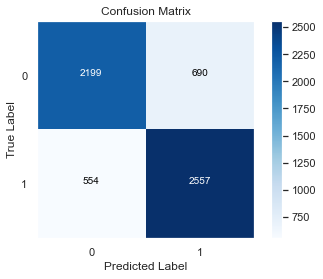

In [172]:
rf_best_text_start = time.time()

best_text_rf = RandomForestClassifier(max_depth=40, min_samples_split=2, n_estimators=400)

best_text_rf.fit(X_train_text, y_train_text)

best_y_text_pred = best_text_rf.predict(X_test_text)

rf_best_text_end = time.time()

print(f"Time taken to run: {round((rf_best_text_end - rf_best_text_start)/60,1)} minutes")
print("\nClassification report:")
print(classification_report(y_test_text, best_y_text_pred, digits=4))
plot_cf(y_test_text, best_y_text_pred)

**Intepretation**: In the Random Forest model without the text variable the GridSearch algorithm improved the model, leading to a F1-Score of 0.8255. Against expectations, the GridSearch algorithm decreased the performance of the model with the text variable. A potential reason for that is that in the hyperparameter tuning process we’re applying a cross-validation approach. GridSearch might actually return a more realistic picture of the performance of the model compared to the basic model.

## XGBoost

XGBoost is a popular and efficient implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models. The concept is designed for speed and performance.

### Basic Model XGBoost

Without text variable:

XGBoost score before hyperparameter tuning for training set: 0.85054
XGBoost score before hyperparameter tuning for test set: 0.82867
Time taken to run: 0.0 minutes

Classification report:
              precision    recall  f1-score   support

           0     0.7918    0.8740    0.8309      2889
           1     0.8705    0.7866    0.8264      3111

    accuracy                         0.8287      6000
   macro avg     0.8311    0.8303    0.8286      6000
weighted avg     0.8326    0.8287    0.8286      6000



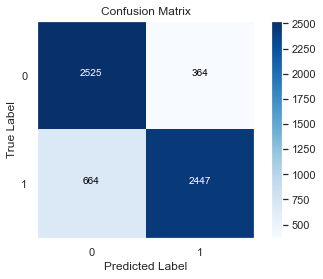

In [165]:
xgb_start = time.time()

xgb_clf = xgb.XGBClassifier()

xgb_clf.fit(X_train, y_train)
y_pred_xgb_test = xgb_clf.predict(X_test)
y_pred_xgb_train = xgb_clf.predict(X_train)

xgb_end = time.time()

print("XGBoost score before hyperparameter tuning for training set:", round(xgb_clf.score(X_train, y_train),5))
print("XGBoost score before hyperparameter tuning for test set:", round(xgb_clf.score(X_test, y_test),5))
print(f"Time taken to run: {round((xgb_end - xgb_start)/60,1)} minutes")
print("\nClassification report:")
print(classification_report(y_test, y_pred_xgb_test,  digits=4))

plot_cf(y_test, y_pred_xgb_test)

With text variable:

XGBoost score before hyperparameter tuning for training set: 0.86638
XGBoost score before hyperparameter tuning for test set: 0.8265
Time taken to run: 0.0 minutes

Classification report:
              precision    recall  f1-score   support

           0     0.7909    0.8695    0.8284      2889
           1     0.8665    0.7866    0.8246      3111

    accuracy                         0.8265      6000
   macro avg     0.8287    0.8280    0.8265      6000
weighted avg     0.8301    0.8265    0.8264      6000



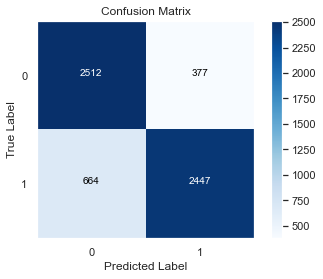

In [ ]:
xgb_start_text = time.time()

xgb_clf_text = xgb.XGBClassifier()

xgb_clf_text.fit(X_train_text, y_train_text)
y_pred_xgb_test_text = xgb_clf_text.predict(X_test_text)
y_pred_xgb_train_text = xgb_clf_text.predict(X_train_text)

xgb_end_text = time.time()

print("XGBoost score before hyperparameter tuning for training set:", round(xgb_clf_text.score(X_train_text, y_train_text),5))
print("XGBoost score before hyperparameter tuning for test set:", round(xgb_clf_text.score(X_test_text, y_test_text),5))
print(f"Time taken to run: {round((xgb_end_text - xgb_start_text)/60,1)} minutes")
print("\nClassification report:")
print(classification_report(y_test_text, y_pred_xgb_test_text, digits=4))

plot_cf(y_test_text, y_pred_xgb_test_text)

**Interpretation**: From our classification report, we can derive that the algorithm is performing very well on the dataset. With an F1 score of 0.8287 in the model without the text variable we reached the highest value of the project.

### Hyperparameter Tuning XGBoost using GridSearch

Without text variable:

In [161]:
start_time = time.time()

xgb_clf = xgb.XGBClassifier()

params_xgb = [ 
  {'n_estimators': [100,200],
   'max_depth': [25, 35],
   'learning_rate': [0.01, 0.1],
   'subsample': [0.7, 1],
   'min_child_weight': [20, 100]
  }
]

grid_xgb = GridSearchCV(estimator=xgb_clf,
                  param_grid=params_xgb,
                  cv=5, scoring='f1')

grid_xgb.fit(X_train, y_train)

end_time = time.time()                     

xgb_best_params = grid_xgb.best_params_

print('Best parameters:', xgb_best_params)
print(f'Time to run the Gridsearch: {round((end_time - start_time)/60,1)} min' )

Best parameters: {'learning_rate': 0.1, 'max_depth': 35, 'min_child_weight': 20, 'n_estimators': 100, 'subsample': 1}
Time to run the Gridsearch: 7.3 min


Time to run the Gridsearch: 0.1 min
XGBoost score for training set: 0.87742
XGBoost score for test set: 0.81283

Classification report:
              precision    recall  f1-score   support

           0     0.7961    0.8217    0.8087      2889
           1     0.8294    0.8046    0.8168      3111

    accuracy                         0.8128      6000
   macro avg     0.8127    0.8132    0.8127      6000
weighted avg     0.8133    0.8128    0.8129      6000



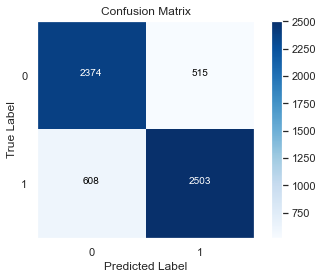

In [163]:
opt_xgb_start_time = time.time()

opt_xgb = xgb.XGBClassifier(learning_rate=0.1, max_depth=35, min_child_weight=20, n_estimators=100, subsample=1)

opt_xgb.fit(X_train, y_train)

xgb_y_pred_train = opt_xgb.predict(X_train)
xgb_y_pred_test = opt_xgb.predict(X_test)

opt_xgb_end_time = time.time()

print(f'Time to run the Gridsearch: {round((opt_xgb_end_time - opt_xgb_start_time)/60,1)} min' )
print("XGBoost score for training set:", round(opt_xgb.score(X_train, y_train),5))
print("XGBoost score for test set:", round(opt_xgb.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, xgb_y_pred_test, digits=4))

plot_cf(y_test, xgb_y_pred_test)

With text variable:

In [169]:
start_time = time.time()

xgb_clf_text = xgb.XGBClassifier()

params_xgb_text = [ 
  {'n_estimators': [100,200],
   'max_depth': [25, 35],
   'learning_rate': [0.01, 0.1],
   'subsample': [0.7, 1],
   'min_child_weight': [20, 100]
  }
]

grid_xgb_text = GridSearchCV(estimator=xgb_clf_text,
                  param_grid=params_xgb_text,
                  cv=5, scoring='f1')

grid_xgb_text.fit(X_train_text, y_train_text)

end_time = time.time()                     

xgb_best_params_text = grid_xgb_text.best_params_

print('Best parameters:', xgb_best_params_text)
print(f'Time to run the Gridsearch: {round((end_time - start_time)/60,1)} min' )

Best parameters: {'learning_rate': 0.1, 'max_depth': 25, 'min_child_weight': 20, 'n_estimators': 100, 'subsample': 1}
Time to run the Gridsearch: 30.2 min


Time to run the Gridsearch: 0.2 min
XGBoost score for training set: 0.85958
XGBoost score for test set: 0.8165

Classification report:
              precision    recall  f1-score   support

           0     0.7933    0.8370    0.8146      2889
           1     0.8404    0.7975    0.8184      3111

    accuracy                         0.8165      6000
   macro avg     0.8169    0.8172    0.8165      6000
weighted avg     0.8177    0.8165    0.8166      6000



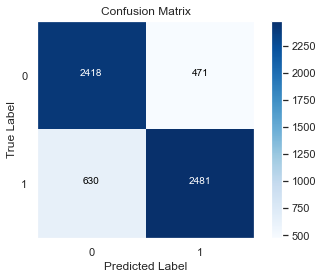

In [171]:
opt_xgb_start_time_text = time.time()

opt_xgb_best_text = xgb.XGBClassifier(learning_rate=0.1, max_depth=25, min_child_weight=20, n_estimators=100, subsample=1)

opt_xgb_best_text.fit(X_train_text, y_train_text)

xgb_y_pred_best_test_text = opt_xgb_best_text.predict(X_test_text)

opt_xgb_end_time_text = time.time()

print(f'Time to run the Gridsearch: {round((opt_xgb_end_time_text - opt_xgb_start_time_text)/60,1)} min' )
print("XGBoost score for training set:", round(opt_xgb_best_text.score(X_train_text, y_train_text),5))
print("XGBoost score for test set:", round(opt_xgb_best_text.score(X_test_text, y_test_text),5))
print("\nClassification report:")
print(classification_report(y_test_text, xgb_y_pred_best_test_text, digits=4))
plot_cf(y_test, xgb_y_pred_best_test_text)

With an F1-Score of 0.8128 on the test data, we find that tuning the hyperparameter was not successful. Similarly to the Random Forest Model, we assume that through a cross-validated GridSearch we receive a more robust evaluation metric. Despite, it is slightly lower.

# EVALUATION OF THE MODEL

To achieve comparability we created an evaluation matrix with all models measuring the F1 score as well as the run time with and without text features. For technical reasons, we differentiated between our sample data and the whole dataset. Overall, we can analyse that all models have similar level of performance at around 0.8. Nevertheless, it makes a difference whether text variables are included, dimensionality reduction is performed, or hyperparameters are tuned. All in all, for our sample data the **XGBoost without text variables and without hyperparameter tuning** has the overall best performance. For the entire data set, the basic model of **Logistic Regression with text variables and without hyperparameter tuning** has the best performance. With an overall runtime of less than three minutes this a reasonable model to perform in a real-world scenario. At the moment of this evaluation the runtime of the XGBoost models exceeded our computational capabilities. Thus, we decided to take the **Logistic Regression model** that performed best on the whole data set for the employment.

<img src="model-evaluation.jpg" alt="Model evaluation" width="850"/>

<img src="model-evaluation-whole-dataset.jpg" alt="Model evaluation whole dataset" width="850"/>

# DEPLOYMENT

This project was designed to build an effective approach to determine the probability of Kickstarter projects before the launch. At the moment of the evaluation, we were not able to run the XGBoost model on the entire dataset. To showcase a potential use case, we’re deploying the Logistic Regression with tuned hyperparameters on projects that were labelled as “live” in the dataset because it performed better than RandomForest on the entire dataset. The generated output states the likelihood of the projects being successful. All in all, we were able to demonstrate that the dataset is a meaningful proxy to predict the success of projects.

For creators, this is a valuable model to gauge whether it is worth investing resources in the creation of a project. At the moment, tuning features is out of the scope of this project. With these insights, we think that further exploration in this direction can provide creators with better opportunities to provide the community with better products and drive innovation through crowdfunding.

In [424]:
df_transformed_end = df.drop(['project_id', 'slug', 'slug_len', 'blurb','url','subcategory_id', "launched_at",
                         'created_at', 'nation','city','deadline','nr_backers', 'pledge_per_backer','pledged',
                         'currency', 'usd_pledged', 'current_currency', 'fx_rate', 'state_changed_at','disable_communication', 
                         'is_starrable', 'spotlight'], axis=1)

project_names_con=df_transformed_end_1["name"]

df_transformed_end_1=df_transformed_end.loc[df_transformed_end['state'].isin(["live"])].iloc[-10:]

df_transformed_end_1['staff_pick'] = df_transformed_end['staff_pick'].astype(str)


In [425]:
last_df = pd.concat([df_transformed, df_transformed_end_1], axis=0)

last_df_trans=preprocessor.fit_transform(last_df)
last_df_trans.toarray()

theveryend=pd.DataFrame(last_df_trans.toarray()).iloc[-10:]

proba_conclusion=best_lr.predict_proba(theveryend)
project_names_con=df_transformed_end_1["name"]

table=pd.DataFrame(data=proba_conclusion, index=project_names_con).round(5)
table["Reality"]=["Success","Success","Success","Failed","Success","Failed","Success","Success","Failed","Failed"]

In [426]:
table

,0,1,Reality
name,,,
"JEZGA Magazine Vol. 2 - ""Sex, Love, Gender""",0.48245,0.51755,Success
GOLDENE ZITATEBOX - DIE BESTEN ZITATE DER WELT,0.78117,0.21883,Success
Talon Games CAV: Strike Ops III,0.00007,0.99993,Success
gatherMagic: Event services app for creatives,0.00002,0.99998,Failed
Footloose: Next-Gen Automatic & Health-Tracking Cat Potty,0.00002,0.99998,Success
México. Letra a letra; color a color.,0.00017,0.99983,Failed
28mm Fantasy Troll Meatwalker,0.00002,0.99998,Success
Legion Of Lovecraft | Cthulhu embroidered patches,0.00005,0.99995,Success
Budgies With Grudges,0.00003,0.99997,Failed
